How are in-demand Skils Trending for Data Analyst?

Methodology
   1. Aggregate skill counts
   2. Re-analyze based on percentage of total jobs
   3. Plot the monthly skill demand



In [1]:
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt

#Load_Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Date_CleanUp
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

c:\Users\user\anaconda3\envs\python_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
df_DA_US = df[(df['job_title'] == 'Data Analyst') & (df['job_country']=='United States')].copy()
df_DA_UK = df[(df['job_title'] == 'Data Analyst') & (df['job_country']=='United Kingdom')].copy()

df_DA_UK

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
420,Data Analyst,Data Analyst,United Kingdom,via WJTV Jobs,Full-time,False,United Kingdom,2023-02-01 13:53:23,True,False,United Kingdom,None,NaN,NaN,Coburg Banks Technical,None,None
434,Data Analyst,Data Analyst,"Birmingham, UK",via LinkedIn,Full-time,False,United Kingdom,2023-02-01 13:53:25,True,False,United Kingdom,None,NaN,NaN,BT Group,"[sas, sas, sql, qlik, tableau]","{'analyst_tools': ['sas', 'qlik', 'tableau'], ..."
533,Data Analyst,Data Analyst,United Kingdom,via BeBee,Temp work,False,United Kingdom,2023-09-30 13:11:42,True,False,United Kingdom,None,NaN,NaN,Erin Associates Ltd.,[sql],{'programming': ['sql']}
1627,Data Analyst,Data Analyst,"Sunderland, UK",via MyArklaMiss Jobs,Full-time,False,United Kingdom,2023-08-25 13:18:07,True,False,United Kingdom,None,NaN,NaN,Expleo Group UK Jobs,"[go, sql, python, aws]","{'cloud': ['aws'], 'programming': ['go', 'sql'..."
1723,Data Analyst,Data Analyst,"Leeds, UK",via BeBee,Full-time,False,United Kingdom,2023-09-30 13:11:58,False,False,United Kingdom,None,NaN,NaN,Agility Resoucing,"[python, sql, r, vba, excel, power bi, tableau]","{'analyst_tools': ['excel', 'power bi', 'table..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
784107,Data Analyst,Data Analyst,"Mansfield, UK",via Jobs Trabajo.org,Full-time,False,United Kingdom,2023-01-22 06:21:03,True,False,United Kingdom,None,NaN,NaN,Sports Direct retailer Careers,[sql],{'programming': ['sql']}
784185,Data Analyst,Data Analyst,United Kingdom,via Jobs Trabajo.org,Full-time,False,United Kingdom,2023-01-23 06:14:46,True,False,United Kingdom,None,NaN,NaN,Reed Technology,None,None
784335,Data Analyst,Data Analyst,"Durham, UK",via Jobs Trabajo.org,Full-time,False,United Kingdom,2023-01-22 06:21:03,True,False,United Kingdom,None,NaN,NaN,Identify Talent,None,None
784610,Data Analyst,Data Analyst,United Kingdom,via Jobs Trabajo.org,Full-time,False,United Kingdom,2023-01-21 06:40:29,True,False,United Kingdom,None,NaN,NaN,Totaljobs Group,[excel],{'analyst_tools': ['excel']}


In [4]:
df_DA_UK['job_posted_month_no'] =df_DA_UK['job_posted_date'].dt.month
df_DA_US['job_posted_month_no'] =df_DA_US['job_posted_date'].dt.month

In [32]:
df_DA_US_explode = df_DA_US.explode('job_skills')
df_DA_UK_explode = df_DA_UK.explode('job_skills')

In [53]:
df_DA_UK_pivot = df_DA_UK_explode.pivot_table(index='job_posted_month_no', columns='job_skills', aggfunc='size', fill_value=0)
df_DA_US_pivot = df_DA_US_explode.pivot_table(index='job_posted_month_no', columns='job_skills', aggfunc='size', fill_value=0)

In [54]:
df_DA_UK_pivot.loc['Total'] = df_DA_UK_pivot.sum()
df_DA_US_pivot.loc['Total'] = df_DA_US_pivot.sum()


In [55]:
df_DA_UK_pivot

job_skills,airflow,airtable,alteryx,asana,assembly,atlassian,aurora,aws,azure,bash,...,unreal,vba,visio,visual basic,vmware,watson,windows,wire,word,zoom
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,1,0,8,0,0,1,0,10,26,1,...,0,16,9,3,0,0,2,0,28,0
2,0,0,7,0,0,0,0,8,28,2,...,0,7,2,0,2,0,4,0,16,0
3,0,0,2,0,0,0,0,7,13,0,...,0,10,0,1,0,0,2,0,10,1
4,1,0,2,0,0,0,0,7,9,0,...,0,5,0,1,0,0,3,0,10,0
5,2,0,3,0,0,1,0,8,16,0,...,0,7,3,0,0,0,0,0,8,0
6,1,0,1,0,1,0,1,15,19,0,...,0,9,2,0,0,0,1,0,12,0
7,2,0,1,0,0,0,0,13,31,0,...,0,9,0,1,2,0,3,0,16,0
8,0,0,0,0,0,0,0,9,17,0,...,0,7,0,1,1,0,4,1,11,0
9,2,0,4,1,0,0,1,17,24,0,...,0,25,0,5,1,1,1,0,13,1


In [57]:
df_DA_UK_pivot = df_DA_UK_pivot[df_DA_UK_pivot.loc['Total'].sort_values(ascending=False).index]
df_DA_US_pivot = df_DA_US_pivot[df_DA_US_pivot.loc['Total'].sort_values(ascending=False).index]

In [58]:
df_DA_UK_pivot = df_DA_UK_pivot.drop('Total')
df_DA_US_pivot = df_DA_US_pivot.drop('Total')

In [59]:
df_DA_US_totals = df_DA_US.groupby('job_posted_month_no').size()
df_DA_UK_totals = df_DA_UK.groupby('job_posted_month_no').size()

In [60]:
df_DA_US_percent = df_DA_US_pivot.div(df_DA_US_totals/100, axis=0)
df_DA_UK_percent = df_DA_UK_pivot.div(df_DA_UK_totals/100, axis=0)

In [61]:
df_DA_UK_pivot

job_skills,sql,excel,power bi,python,tableau,r,sas,azure,go,powerpoint,...,drupal,assembly,monday.com,pytorch,node,powerbi,unreal,terraform,watson,wire
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,255,226,157,95,91,50,74,26,15,32,...,0,0,0,0,1,0,0,0,0,0
2,182,162,92,61,57,37,38,28,14,16,...,0,0,0,0,0,0,0,0,0,0
3,119,105,71,47,50,31,14,13,18,11,...,0,0,0,0,0,0,0,0,0,0
4,84,78,46,40,28,17,24,9,11,7,...,0,0,0,0,0,1,0,0,0,0
5,114,84,59,30,29,18,8,16,12,9,...,0,0,0,0,0,0,0,0,0,0
6,102,95,79,36,37,17,8,19,12,17,...,0,1,0,0,0,0,0,0,0,0
7,131,113,97,52,42,29,34,31,14,18,...,1,0,0,0,0,0,0,0,0,0
8,109,78,64,39,39,16,10,17,13,7,...,0,0,0,0,0,0,0,0,0,1
9,211,167,130,99,87,58,24,24,15,11,...,0,0,0,0,0,0,0,0,1,0


In [62]:
df_DA_UK_percent

job_skills,sql,excel,power bi,python,tableau,r,sas,azure,go,powerpoint,...,drupal,assembly,monday.com,pytorch,node,powerbi,unreal,terraform,watson,wire
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,49.132948,43.545279,30.250482,18.304432,17.533719,9.633911,14.258189,5.009634,2.890173,6.165703,...,0.000000,0.000000,0.000000,0.000000,0.192678,0.000000,0.000000,0.000000,0.000000,0.000000
2,51.267606,45.633803,25.915493,17.183099,16.056338,10.422535,10.704225,7.887324,3.943662,4.507042,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,50.210970,44.303797,29.957806,19.831224,21.097046,13.080169,5.907173,5.485232,7.594937,4.641350,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,48.000000,44.571429,26.285714,22.857143,16.000000,9.714286,13.714286,5.142857,6.285714,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.571429,0.000000,0.000000,0.000000,0.000000
5,56.435644,41.584158,29.207921,14.851485,14.356436,8.910891,3.960396,7.920792,5.940594,4.455446,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,47.441860,44.186047,36.744186,16.744186,17.209302,7.906977,3.720930,8.837209,5.581395,7.906977,...,0.000000,0.465116,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,51.778656,44.664032,38.339921,20.553360,16.600791,11.462451,13.438735,12.252964,5.533597,7.114625,...,0.395257,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,51.415094,36.792453,30.188679,18.396226,18.396226,7.547170,4.716981,8.018868,6.132075,3.301887,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.471698
9,57.181572,45.257453,35.230352,26.829268,23.577236,15.718157,6.504065,6.504065,4.065041,2.981030,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.271003,0.000000


In [63]:
df_DA_US_percent =df_DA_US_percent.reset_index()
df_DA_US_percent['job_posted_month'] = df_DA_US_percent['job_posted_month_no'].apply(lambda x: pd.to_datetime(x, format='%m').strftime('%b'))
df_DA_US_percent = df_DA_US_percent.set_index('job_posted_month')
df_DA_US_percent = df_DA_US_percent.drop(columns='job_posted_month_no')

df_DA_US_percent

job_skills,sql,excel,tableau,python,power bi,sas,r,word,powerpoint,oracle,...,mariadb,mxnet,next.js,ringcentral,sqlserver,svelte,theano,tidyr,symphony,yarn
job_posted_month,,,,,,,,,,,,,,,,,,,,,
Jan,62.665198,43.006608,35.572687,29.129956,17.951542,21.696035,18.612335,9.306167,9.691630,9.030837,...,0.000000,0.000000,0.000000,0.055066,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000
Feb,60.903427,42.367601,31.775701,29.439252,23.520249,21.028037,18.146417,9.968847,10.124611,7.710280,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000
Mar,58.883994,42.584435,33.994126,29.368576,20.337739,22.026432,17.694567,10.425844,9.324523,7.856094,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000
Apr,61.723886,42.147553,33.747261,30.752374,21.329438,18.845873,17.384953,10.445581,9.715121,8.911614,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000
May,61.072664,42.387543,31.747405,29.065744,21.712803,17.820069,18.944637,7.958478,10.294118,8.477509,...,0.086505,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000
Jun,61.474731,40.679370,32.725766,32.808616,22.535211,16.735708,20.878210,10.439105,9.610605,8.202154,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000
Jul,58.638743,45.130890,30.994764,30.575916,19.895288,19.057592,19.685864,10.575916,10.575916,6.492147,...,0.000000,0.000000,0.104712,0.000000,0.104712,0.000000,0.000000,0.0000,0.000000,0.104712
Aug,55.445545,45.332390,33.946252,32.531825,20.650636,19.236209,22.701556,7.920792,9.405941,6.930693,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000
Sep,56.658879,39.252336,32.359813,29.556075,21.378505,17.523364,18.341121,7.593458,6.191589,7.827103,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.116822,0.000000


In [64]:
df_DA_UK_percent =df_DA_UK_percent.reset_index()
df_DA_UK_percent['job_posted_month'] = df_DA_UK_percent['job_posted_month_no'].apply(lambda x: pd.to_datetime(x, format='%m').strftime('%b'))
df_DA_UK_percent = df_DA_UK_percent.set_index('job_posted_month')
df_DA_UK_percent = df_DA_UK_percent.drop(columns='job_posted_month_no')

df_DA_UK_percent

job_skills,sql,excel,power bi,python,tableau,r,sas,azure,go,powerpoint,...,drupal,assembly,monday.com,pytorch,node,powerbi,unreal,terraform,watson,wire
job_posted_month,,,,,,,,,,,,,,,,,,,,,
Jan,49.132948,43.545279,30.250482,18.304432,17.533719,9.633911,14.258189,5.009634,2.890173,6.165703,...,0.000000,0.000000,0.000000,0.000000,0.192678,0.000000,0.000000,0.000000,0.000000,0.000000
Feb,51.267606,45.633803,25.915493,17.183099,16.056338,10.422535,10.704225,7.887324,3.943662,4.507042,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Mar,50.210970,44.303797,29.957806,19.831224,21.097046,13.080169,5.907173,5.485232,7.594937,4.641350,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Apr,48.000000,44.571429,26.285714,22.857143,16.000000,9.714286,13.714286,5.142857,6.285714,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.571429,0.000000,0.000000,0.000000,0.000000
May,56.435644,41.584158,29.207921,14.851485,14.356436,8.910891,3.960396,7.920792,5.940594,4.455446,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Jun,47.441860,44.186047,36.744186,16.744186,17.209302,7.906977,3.720930,8.837209,5.581395,7.906977,...,0.000000,0.465116,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Jul,51.778656,44.664032,38.339921,20.553360,16.600791,11.462451,13.438735,12.252964,5.533597,7.114625,...,0.395257,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Aug,51.415094,36.792453,30.188679,18.396226,18.396226,7.547170,4.716981,8.018868,6.132075,3.301887,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.471698
Sep,57.181572,45.257453,35.230352,26.829268,23.577236,15.718157,6.504065,6.504065,4.065041,2.981030,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.271003,0.000000


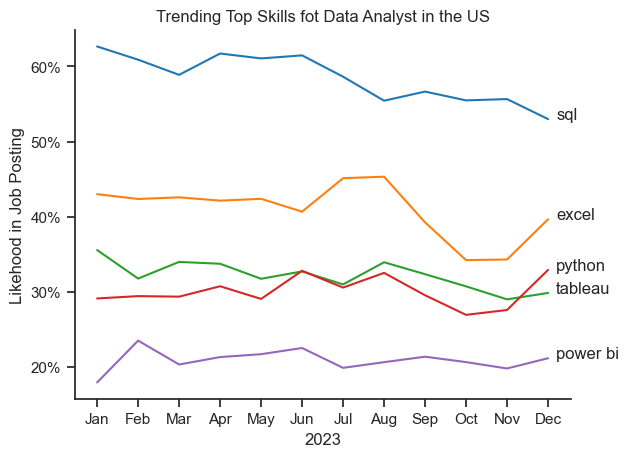

In [73]:
df_US_plot = df_DA_US_percent.iloc[:, :5]

sns.lineplot(df_US_plot, dashes=False, palette='tab10')
sns.set_theme(style='ticks')
sns.despine()

plt.title('Trending Top Skills fot Data Analyst in the US')
plt.ylabel('Likehood in Job Posting')
plt.xlabel(2023)
plt.legend().remove()

from matplotlib.ticker import PercentFormatter
ax = plt.gca()
ax.yaxis.set_major_formatter(PercentFormatter(decimals=0))

for i in range(5):
    plt.text(11.2, df_US_plot.iloc[-1, i], df_US_plot.columns[i])

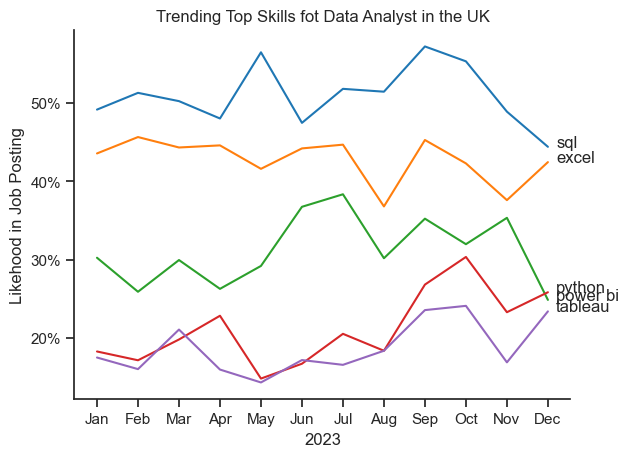

In [76]:
df_UK_plot = df_DA_UK_percent.iloc[:, :5]

sns.lineplot(df_UK_plot, dashes=False, palette='tab10')
sns.set_theme(style='ticks')
sns.despine()

plt.title('Trending Top Skills fot Data Analyst in the UK')
plt.ylabel('Likehood in Job Posting')
plt.xlabel(2023)
plt.legend().remove()

from matplotlib.ticker import PercentFormatter
ax = plt.gca()
ax.yaxis.set_major_formatter(PercentFormatter(decimals=0))

for i in range(5):
    plt.text(11.2, df_UK_plot.iloc[-1, i], df_UK_plot.columns[i])